In [1]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True
# === SETUP ===
train_dir = r"C:\Users\kosgi Nandini\Desktop\AI Projects\capston\Historical Structures Classification Dataset\Part 1\dataset_hist_structures 2\dataset_hist_structures\Dataset_test\Dataset_test_original_1478"
val_dir = r"C:\Users\kosgi Nandini\Desktop\AI Projects\capston\Historical Structures Classification Dataset\Part 1\dataset_hist_structures 2\dataset_hist_structures\Dataset_test\Dataset_test_original_1478"

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# === DATA GENERATORS ===
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Automatically detect number of classes
num_classes = len(train_generator.class_indices)
print("Detected Classes:", train_generator.class_indices)

# === MODEL ===
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')  # Updated to match classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# === CALLBACKS ===
early_stop = EarlyStopping(monitor='val_loss', patience=3)

# === TRAINING ===
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[early_stop]
)



Found 757 images belonging to 6 classes.
Found 757 images belonging to 6 classes.
Detected Classes: {'bell_tower': 0, 'dome(inner)': 1, 'dome(outer)': 2, 'flying_buttress': 3, 'gargoyle': 4, 'stained_glass': 5}


C:\Users\kosgi Nandini\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\kosgi Nandini\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 24s 954ms/step - accuracy: 0.2863 - loss: 4.3341 - val_accuracy: 0.4993 - val_loss: 1.2352
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 22s 917ms/step - accuracy: 0.5300 - loss: 1.1578 - val_accuracy: 0.7860 - val_loss: 0.8077
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 23s 949ms/step - accuracy: 0.7168 - loss: 0.7597 - val_accuracy: 0.8243 - val_loss: 0.4911
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 23s 948ms/step - accuracy: 0.8229 - loss: 0.4944 - val_accuracy: 0.9353 - val_loss: 0.2833
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 23s 952ms/step - accuracy: 0.9462 - loss: 0.2383 - val_accuracy: 0.9590 - val_loss: 0.1405
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9826 - loss: 0.0811 - val_accuracy: 0.9987 - val_loss: 0.0328
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 1.0000 - loss: 0.0293 - val_accuracy: 1.0000 - val_loss: 0.0096
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 23s 953ms/step - accuracy: 1.0000 - loss: 0.0084 - val_accuracy: 

In [2]:
model.save("cathedral_features_classifier.h5")


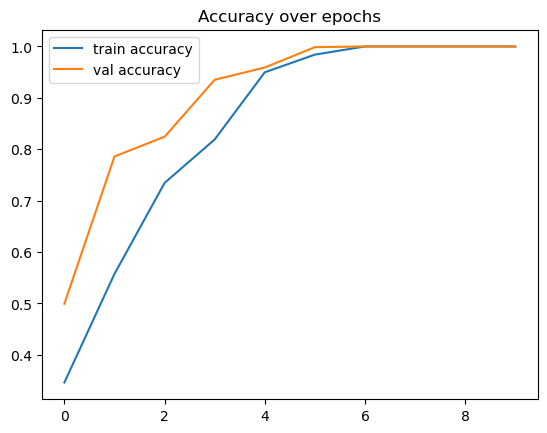

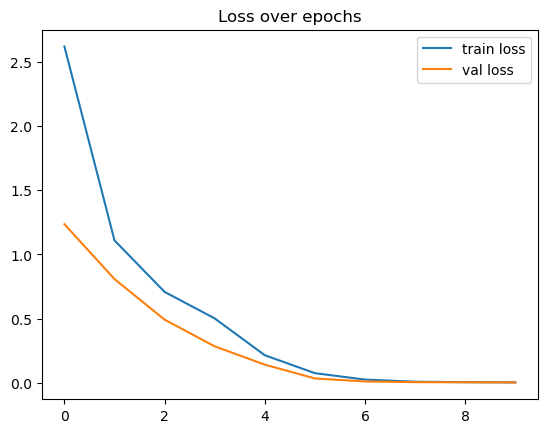

In [14]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy over epochs')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss over epochs')
plt.legend()
plt.show()


In [15]:
#Test on New Images: Load a random image and run predictions to test real-world performance:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = r"C:\Users\kosgi Nandini\Desktop\AI Projects\capston\Historical Structures Classification Dataset\Part 1\dataset_hist_structures 2\dataset_hist_structures\Dataset_test\Dataset_test_original_1478\stained_glass\img1.jpg"


# Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))  # Correct input size
img_array = image.img_to_array(img) / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Batch dimension

# Predict
prediction = model.predict(img_array)
class_idx = np.argmax(prediction)
class_labels = train_generator.class_indices  # if you have this available
predicted_class = list(class_labels.keys())[list(class_labels.values()).index(class_idx)]

print(f"Predicted class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Predicted class: stained_glass


In [16]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,724,500 (273.61 MB)

 Trainable params: 23,908,166 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 47,816,334 (182.40 MB)